# Experiment 3 B



- in this experiment we try to compute the same SHM formula as done in experiment 3a, but without auxillary vairables


- the computation takes a big hit with around 22m of training and fitting time (for function approximation)

In [1]:
from kan.MultKAN import MultKAN



In [2]:
from kan.utils import create_dataset, augment_input
from sympy import symbols, cos
import torch

# Set seed and precision
seed = 1
torch.manual_seed(seed)
torch.set_default_dtype(torch.float64)

# Step 1: Define input variables
input_variables = A, omega, t = symbols('A omega t')

# # Step 2: Define auxiliary variable
# theta = omega * t
# cos_theta = cos(theta)

# aux_vars = (theta , cos_theta)


# Step 3: Define function f: input → output (s = A cos(ωt))
f = lambda x: x[:, [0]] * torch.cos(x[:, [1]] * x[:, [2]])

# Step 4: Create dataset
dataset = create_dataset(
    f,
    n_var=3,
    ranges=[
        [1, 10],       # A
        [0.5, 5.0],    # omega
        [0, 2 * 3.1416]  # t (approx 0 to 2π)
    ]
)

# # Step 5: Add auxiliary variable θ = ωt
# dataset = augment_input(input_variables, aux_vars, dataset)
# input_variables = aux_vars + input_variables  # Optional reordering for interpretability


In [3]:
model = MultKAN(width=[3,[5,5] , [5,5] ], mult_arity=2, grid=3, k=3, seed=seed)

checkpoint directory created: ./model
saving model version 0.0


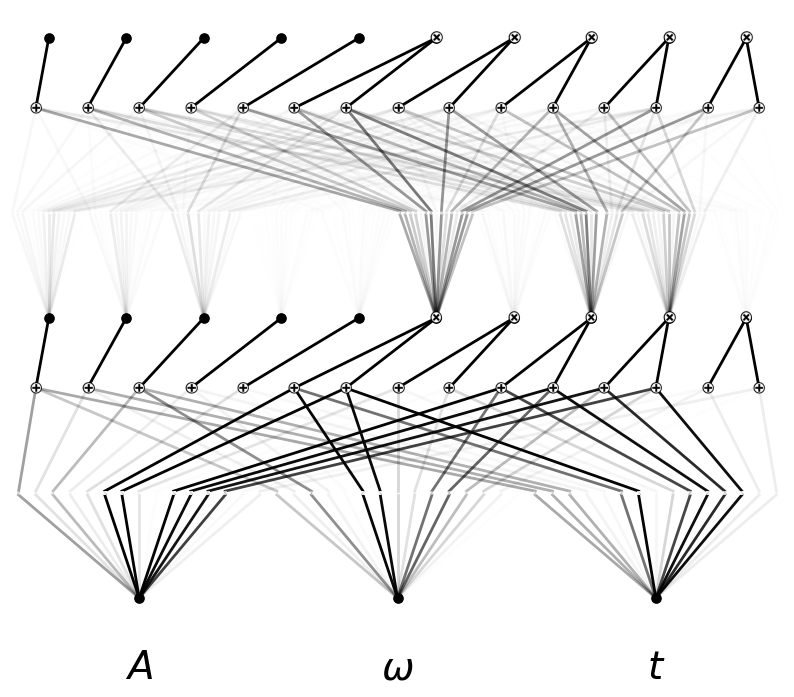

In [4]:
model(dataset['train_input'])
model.plot(in_vars=input_variables, scale=1.0, varscale=0.7)

In [5]:
model.fit(dataset, steps=50, lamb=1e-5, lamb_coef=1.0);

| train_loss: 2.95e+00 | test_loss: 3.14e+00 | reg: 3.03e+02 | : 100%|█| 50/50 [00:20<00:00,  2.40it

saving model version 0.1


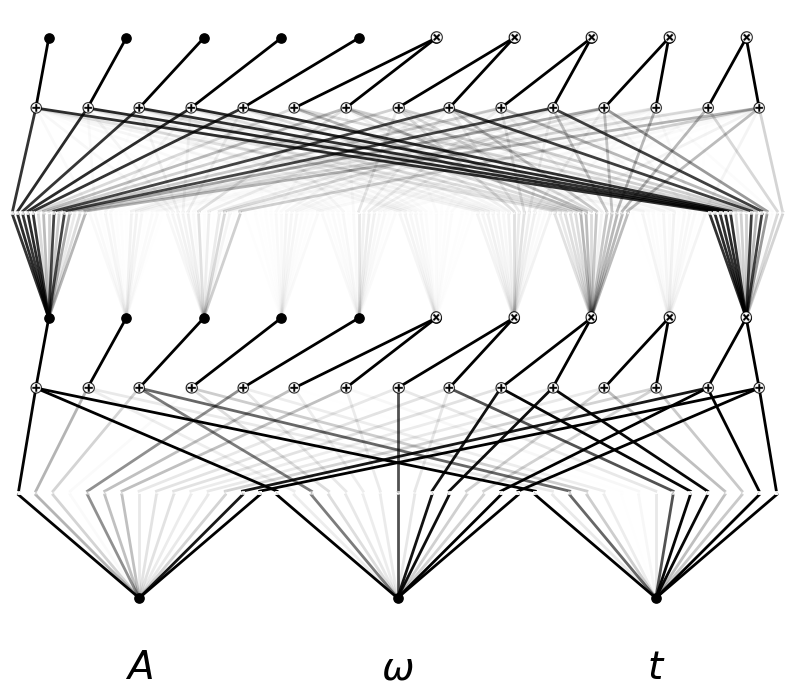

In [6]:
model.plot(in_vars=input_variables, scale=1.0, varscale=0.7)

In [7]:
model = model.prune(edge_th=5e-2)

saving model version 0.2


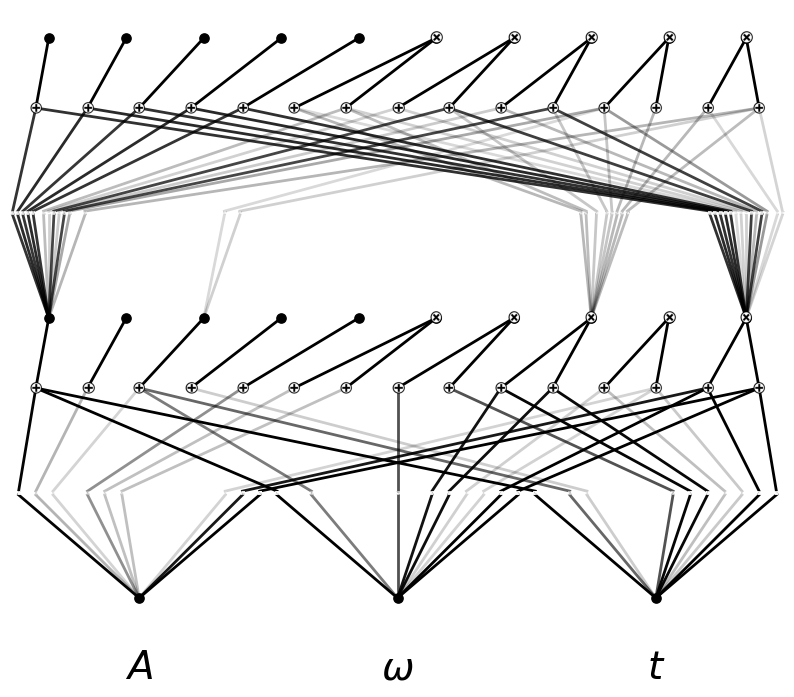

In [9]:


model.plot(in_vars=input_variables, scale=1.0, varscale=0.7)


In [10]:
model.fit(dataset, steps=100, lamb=0e-3);

| train_loss: 2.90e+00 | test_loss: 3.48e+00 | reg: 6.56e+01 | : 100%|█| 100/100 [00:25<00:00,  3.96

saving model version 0.3


In [11]:
model.auto_symbolic()

fixing (0,0,0) with 1/x^0.5, r2=0.9976896329679338, c=2
fixing (0,0,1) with x^0.5, r2=0.9999899058144404, c=2
fixing (0,0,2) with 0, r2=0.0, c=0
fixing (0,0,3) with 0
fixing (0,0,4) with x, r2=0.9996359239248838, c=1
fixing (0,0,5) with x, r2=0.9998597333523368, c=1
fixing (0,0,6) with x, r2=0.9997218098960808, c=1
fixing (0,0,7) with 0
fixing (0,0,8) with 0
fixing (0,0,9) with 0
fixing (0,0,10) with 0
fixing (0,0,11) with 0
fixing (0,0,12) with x, r2=0.9975500580203065, c=1
fixing (0,0,13) with 0, r2=0.0, c=0
fixing (0,0,14) with 1/x^2, r2=0.9996593234661753, c=2
fixing (0,1,0) with exp, r2=0.9998386177053931, c=2
fixing (0,1,1) with 0
fixing (0,1,2) with 0, r2=0.0, c=0
fixing (0,1,3) with 0
fixing (0,1,4) with 0
fixing (0,1,5) with 0
fixing (0,1,6) with 0
fixing (0,1,7) with x, r2=0.9981232878464158, c=1
fixing (0,1,8) with 0
fixing (0,1,9) with cos, r2=0.9994257585277729, c=2
fixing (0,1,10) with 0, r2=0.0, c=0
fixing (0,1,11) with x^0.5, r2=0.9998023338079495, c=2
fixing (0,1,12) w

In [13]:
sf = model.symbolic_formula(var=input_variables)[0][0]
sf

-0.0758093183192443

In [15]:
from kan.utils import ex_round 
from kan import nsimplify


nsimplify(ex_round(ex_round(ex_round(sf,6),3),3))

-7/92

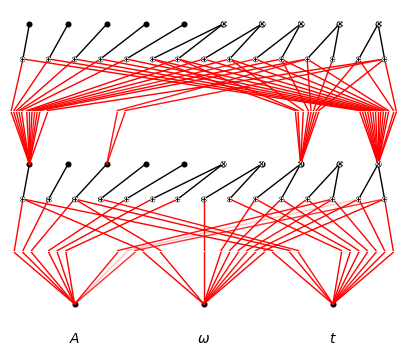

In [16]:
model.plot(metric='forward_u' , in_vars=input_variables , varscale= 0.5)

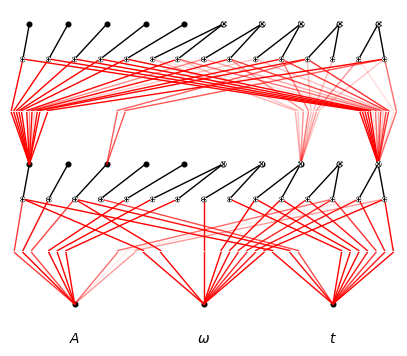

In [17]:
model.plot(metric='forward_n' , in_vars=input_variables , varscale= 0.5)


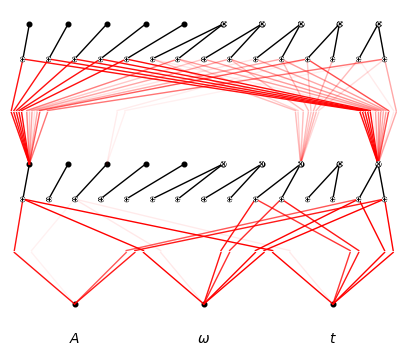

In [18]:
model.plot(metric='backward' , in_vars=input_variables , varscale= 0.5)
